# Simple linear regression Model

In [6]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read file
df = pd.read_csv('./data/Salary_dataset.csv', index_col=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [9]:
df.shape

(30, 2)

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [7]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


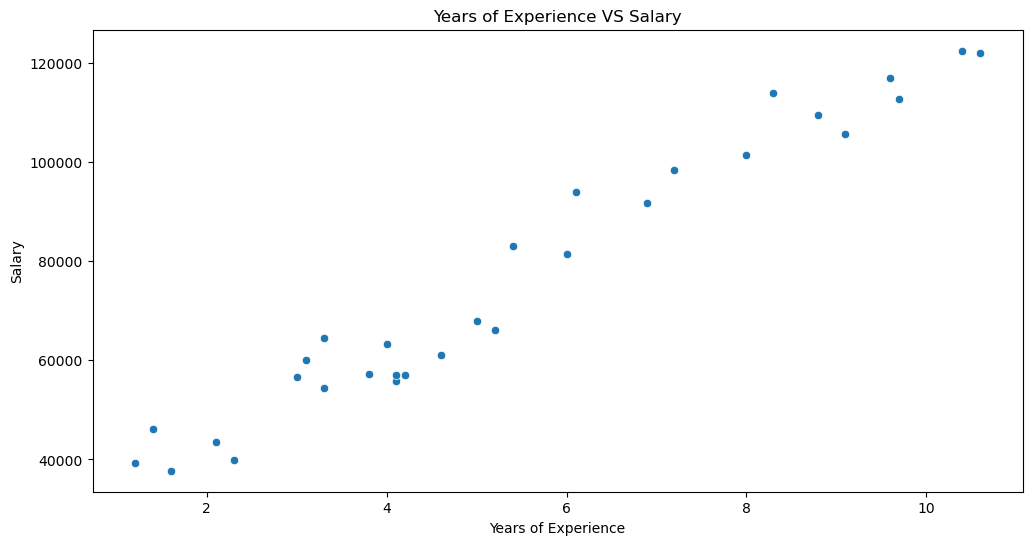

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience VS Salary')
plt.show()

## Get b0 and b1

In [31]:
# 
# Y = bX + a
# Y = b1 + b0*X

# find b1 (interceptor)
# Formula is std from y divided by std from X and multiplied by relation coefficient(r)

def get_relation_coefficient(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = 0
    denominator_s1 = 0
    denominator_s2 = 0
    
    for i in range(len(x)):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        
        denominator_s1 += (x[i] - x_mean)**2
        denominator_s2 += (y[i] - y_mean)**2
        
    full_denominator = (denominator_s1 * denominator_s2) ** (1/2)
        
    return numerator / full_denominator


In [33]:
relation_coefficient = get_relation_coefficient(df['YearsExperience'], df['Salary'])

In [38]:
# get pendiente (coeficient)
slope = relation_coefficient * ( np.std(df['Salary']) / np.std(df['YearsExperience']))
slope

np.float64(9449.962321455076)

In [39]:
# get interceptor (sesgo)
interceptor = np.mean(df['Salary']) - slope * np.mean(df['YearsExperience'])
interceptor

np.float64(24848.2039665232)

In [42]:
def get_predicted_salary(X):
    predicted_salary = []
    
    for x_value in X.values:
        salary = interceptor + (slope * x_value)
        predicted_salary.append(salary)
    
    # pythonic    
    # X_array = df['YearsExperience'].values # O simplemente el array X que ya tenías
    # predicted_salary_vectorized = interceptor + slope * X_array
    
    return np.array(predicted_salary)

In [49]:
predicted_salary = get_predicted_salary(df['YearsExperience'])

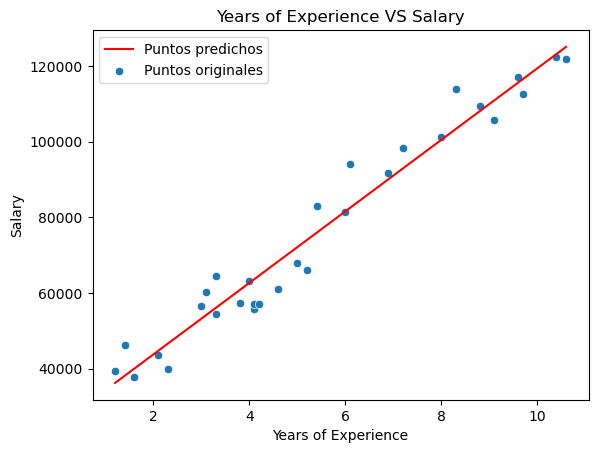

In [54]:
plt.plot(df['YearsExperience'].values, predicted_salary, color='red', label='Puntos predichos')

sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Puntos originales')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience VS Salary')
plt.legend()
plt.show()